### Load Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [30]:
calendar = pd.read_csv('./data/calendar.csv')
prices = pd.read_csv('./data/sell_prices.csv')

sample = pd.read_csv('./data/sample_submission.csv')

In [20]:
display(calendar.head())
display(prices.head())

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


### EDA

In [32]:
sample.id.sample(25)

41140    HOUSEHOLD_2_408_CA_4_evaluation
36317        FOODS_3_554_CA_2_evaluation
31055    HOUSEHOLD_1_001_CA_1_evaluation
35468        FOODS_2_103_CA_2_evaluation
13060    HOUSEHOLD_1_306_TX_1_validation
3065       HOBBIES_1_017_CA_2_validation
6724     HOUSEHOLD_1_064_CA_3_validation
32859        FOODS_3_145_CA_1_evaluation
22533    HOUSEHOLD_2_094_WI_1_validation
38341        FOODS_1_144_CA_3_evaluation
46220      HOBBIES_2_070_TX_2_evaluation
29962        FOODS_3_297_WI_3_validation
35313        FOODS_1_166_CA_2_evaluation
4751         FOODS_1_092_CA_2_validation
48112        FOODS_3_153_TX_2_evaluation
22527    HOUSEHOLD_2_088_WI_1_validation
25530    HOUSEHOLD_2_042_WI_2_validation
26169        FOODS_1_169_WI_2_validation
51476        FOODS_3_468_TX_3_evaluation
53068    HOUSEHOLD_2_139_WI_1_evaluation
27981      HOBBIES_2_125_WI_3_validation
22420    HOUSEHOLD_1_522_WI_1_validation
56760        FOODS_2_051_WI_2_evaluation
8257         FOODS_2_333_CA_3_validation
19269    HOUSEHO

In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [5]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [35]:
prices.item_id.sample(10)

6279832    HOUSEHOLD_1_023
1728593        FOODS_1_118
4378076    HOUSEHOLD_2_096
5650835    HOUSEHOLD_1_261
5596496    HOUSEHOLD_1_004
4717968        FOODS_3_452
858618     HOUSEHOLD_1_144
5383604        FOODS_3_436
441543         FOODS_2_088
3750222    HOUSEHOLD_2_403
Name: item_id, dtype: object

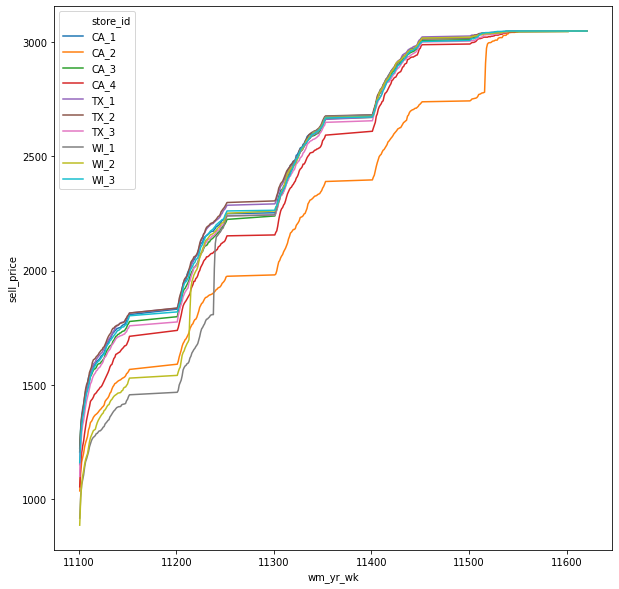

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

tmp = prices.copy()
tmp = tmp.groupby(['wm_yr_wk', 'store_id'])['sell_price'].count()

_ = sns.lineplot(x='wm_yr_wk', y='sell_price', data=tmp.reset_index(), hue='store_id', ax=ax)

In [24]:
calendar.event_name_1.value_counts(dropna=False)

NaN                    1807
PresidentsDay             6
Purim End                 6
NBAFinalsEnd              6
StPatricksDay             6
ValentinesDay             6
LentWeek2                 6
SuperBowl                 6
MemorialDay               6
Mother's day              6
LentStart                 6
Pesach End                6
Ramadan starts            6
NBAFinalsStart            6
Easter                    5
OrthodoxEaster            5
ColumbusDay               5
Christmas                 5
Eid al-Fitr               5
Chanukah End              5
Halloween                 5
MartinLutherKingDay       5
LaborDay                  5
Thanksgiving              5
VeteransDay               5
NewYear                   5
IndependenceDay           5
Cinco De Mayo             5
EidAlAdha                 5
OrthodoxChristmas         5
Father's day              4
Name: event_name_1, dtype: int64

In [25]:
calendar.event_type_1.value_counts(dropna=False)

NaN          1807
Religious      55
National       52
Cultural       37
Sporting       18
Name: event_type_1, dtype: int64

In [26]:
calendar.event_name_2.value_counts(dropna=False)

NaN               1964
Father's day         2
Cinco De Mayo        1
Easter               1
OrthodoxEaster       1
Name: event_name_2, dtype: int64

In [27]:
calendar.event_type_2.value_counts(dropna=False)

NaN          1964
Cultural        4
Religious       1
Name: event_type_2, dtype: int64